In [1]:
# Uses data generated in timing_data_generation

# Plot 1:
# Run a dummy Capytaine round to make sure the initial build happens and we're not timing that
# Run Capytaine with evenly-spaced increasing resolution, get times and values.
# Run MEEM with SAME number of terms/region, evenly-spaced increasing resolution, get times and values.
# Designated value at terms = 300 for MEEM.
# All runs should be repeated 20 times and time-averaged to reduce variability.
# Plot the values on the same plot. x = time, y = value.

# Plot 2:
# Stacked plot for a 2-region configuration, how much time each component takes for same terms/region.
# Terms on x, times on y.

# Plot 3:
# Which calculation dominates if you have y regions and x terms/region? Shares legend and colors with plot 2.

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import ListedColormap, BoundaryNorm
import openflash
print(type(openflash))
print(openflash.__path__)
print(openflash.__file__)


# --- Import core modules from package ---
try:
    from openflash import *
    print("OpenFLASH modules imported successfully!")
except ImportError as e:
    print(f"Error importing OpenFLASH modules. Error: {e}")

# Set NumPy print options for better readability
np.set_printoptions(threshold=np.inf, linewidth=np.inf, precision=8, suppress=True)
from openflash.multi_constants import rho #need for BEM

import sys
from pathlib import Path
HERE = Path.cwd().resolve()
utils_path = (HERE / ".." / "sea-lab-utils").resolve()
utils_str = str(utils_path)
if utils_str not in sys.path:
    sys.path.insert(0, utils_str)
from pyplotutilities import colors # Assuming 'pyplotutilities' is a folder inside 'sea-lab-utils'
from pyplotutilities import fonts
colors.get_colors()
fonts.get_fonts()
print(colors.purple)

figs_path_prefix = str((HERE / ".." / "pubs/JFM/figs").resolve())
store_path_prefix = str((HERE / "data").resolve())

<class 'module'>
['/Users/Bimali/Desktop/SEALab/OpenFLASH/package/src/openflash']
/Users/Bimali/Desktop/SEALab/OpenFLASH/package/src/openflash/__init__.py
OpenFLASH modules imported successfully!
#CC79A7


In [3]:
# Variable Definitions & Data Import
h = 50.00 # sea depth [m]
# omega_sweep = np.linspace(0.4, 1.5, 10) # rad/s
omega_val = 1
d_in = [14.45, 14.45-7.32-5.08] # drafts [m]
d_out = d_in # non-slanted version
a_list = [2.5/2, 8.4/2] # radii [m]
NMK = [100, 100, 100] # number of coefficients in each region
heaving = [1, 1]
face_dist = [a_list[0], d_in[0] - d_in[1], a_list[1] - a_list[0], d_in[1]]
face_fracs = [face_dist[i] / sum(face_dist) for i in range(4)]
cpt_divisions = 15
t_density_lst = [[6 + int(i * 27/cpt_divisions), 12 + int(i * 54/cpt_divisions)] for i in range(cpt_divisions)]
face_unit_lst = [10 + int(i * 40/cpt_divisions) for i in range(cpt_divisions)]
nmk_max = 300
nmk_lst = list(range(5, 101, 5))

config = {"h" : h,
          "a" : a_list,
          "d_in" : d_in,
          "d_out" : d_out,
          "heaving": heaving,
          "omega" : omega_val,
          "rho" : rho}

data_file = store_path_prefix + "/timing.pkl"

with open(data_file, 'rb') as file:
    all_data = pickle.load(file)

true_am = all_data["True Added Mass"]
true_dp = all_data["True Damping"]
true_vals = {"Added Mass" : true_am, "Damping" : true_dp}
meem_reorganized_data = all_data["MEEM Data"]
cpt_data = all_data["Capytaine Data"]

named_meem_times = ["Coupling Integrals", "Root Finding", "Matrix Solve",
                    "Bessel Functions", "Hydrodynamic Coefficients"]

In [4]:
# Plot Settings
l_width = 3 # line width
m_size = 7 # marker size
lab_fs = 11 # x and y label font size
leg_fs = lab_fs # legend font size
fig_h = 6 # figure height
fig_w = 5 # figure width

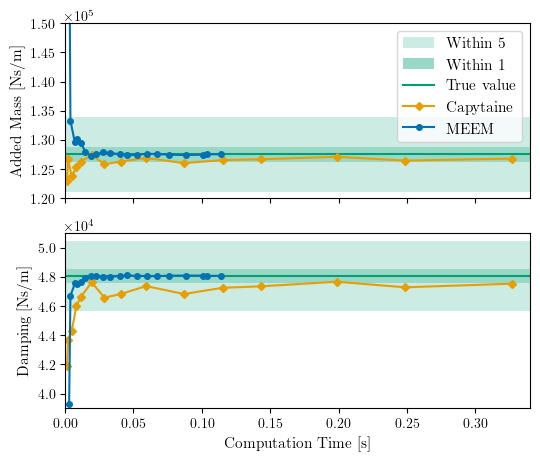

In [5]:
cpt_times = [data["Computation Time"] for data in cpt_data]
meem_times = [data["Total Time"] for data in meem_reorganized_data]

fig, ax = plt.subplots(2, 1, figsize=(fig_h, fig_w), sharex = True)
for a in ax:
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-1, 1)) 
    a.yaxis.set_major_formatter(formatter)

xlim_max = round(max(cpt_times), 2) + 0.01
true_color = colors.green
ax[0].axhspan(1.01 * true_am, 1.05 * true_am, alpha=0.2, color = true_color,
           linewidth=0, label = "Within 5% of true value")
ax[0].axhspan(0.99 * true_am, 1.01 * true_am, alpha=0.4, color = true_color,
           linewidth=0, label = "Within 1% of true value")
ax[0].axhspan(0.95 * true_am, 0.99 * true_am, alpha=0.2, color = true_color,
           linewidth=0)
ax[0].axhline(true_am, linestyle="-", linewidth=l_width-1.5, color = true_color,
           label = "True value")
ax[0].plot(cpt_times, [data["Added Mass"] for data in cpt_data], color = colors.orange,
        marker='D', markersize=m_size-3, label = "Capytaine")
ax[0].plot(meem_times, [data["Added Mass"] for data in meem_reorganized_data], color=colors.blue,
        marker='o', markersize=m_size-3, label = "MEEM")

ax[0].set_ylim([1.2e5, 1.5e5])
ax[0].set_xlim([0, xlim_max])
ax[0].legend(loc='upper right', fontsize=leg_fs, frameon=True)

ax[1].yaxis.set_major_formatter(formatter)
ax[1].axhspan(1.01 * true_dp, 1.05 * true_dp, alpha=0.2, color = true_color,
           linewidth=0)
ax[1].axhspan(0.99 * true_dp, 1.01 * true_dp, alpha=0.4, color = true_color,
           linewidth=0)
ax[1].axhspan(0.95 * true_dp, 0.99 * true_dp, alpha=0.2, color = true_color,
           linewidth=0)
ax[1].axhline(true_dp, linestyle="-", linewidth=l_width-1.5, color = true_color)
ax[1].plot(cpt_times, [data["Damping"] for data in cpt_data], color = colors.orange,
        marker='D', markersize=m_size-3, label = "Capytaine")
ax[1].plot(meem_times, [data["Damping"] for data in meem_reorganized_data], color=colors.blue,
        marker='o', markersize=m_size-3, label = "MEEM")

ax[1].set_xlim([0, xlim_max])
ax[1].set_ylim([3.9e4, 5.1e4])
ax[1].set_xlabel('Computation Time [s]', fontsize=lab_fs)
ax[0].set_ylabel('Added Mass [Ns/m]', fontsize=lab_fs)
ax[1].set_ylabel('Damping [Ns/m]', fontsize=lab_fs)

full_path = figs_path_prefix + "/MEEM-CPT-Speed-Comparison.pdf"
fig.savefig(full_path, format='pdf', dpi=300, bbox_inches='tight')

In [6]:
def convergence_time(data, key, percent):
  frac = 0.01 * percent
  frac_off = lambda x, true_val : abs((x - true_val)/true_val)
  hydro_keys = ["Added Mass", "Damping"]
  out_dict = {hydro_key : None for hydro_key in hydro_keys}
  for hydro_key in hydro_keys:
    true_val = true_vals[hydro_key]
    time_data = [(entry[key], entry[hydro_key]) for entry in data]
    time_data_rev = sorted(time_data, key=lambda x: x[0], reverse=True)
    if frac_off(time_data_rev[0][1], true_val) > frac:
      pass
    else:
      for entry in time_data_rev:
        if frac_off(entry[1], true_val) <= frac:
          inc_frac = frac_off(entry[1], true_val)
          inc_time = entry[0]
          out_dict[hydro_key] = entry[0]
        else:
          new_frac = frac_off(entry[1], true_val)
          new_time = entry[0]
          out_dict[hydro_key] = new_time + (inc_time - new_time) * ((new_frac - frac)/(new_frac - inc_frac))
          break
  return out_dict

def format_convergence_time(val):
  if val is None: return "-"
  else: return f"{(val * 1000):.1f}"


print("Added Mass & Radiation Damping")
print(" & MEEM & Capytaine & MEEM & Capytaine \\\\")
print("\\hline")
for percent in [1, 2, 3, 4, 5]:
  meem_dict = convergence_time(meem_reorganized_data, "Total Time", percent)
  meem_am, meem_dp = meem_dict["Added Mass"], meem_dict["Damping"]
  cpt_dict = convergence_time(cpt_data, "Computation Time", percent)
  cpt_am, cpt_dp = cpt_dict["Added Mass"], cpt_dict["Damping"]
  print(str(percent) + "\\% & " + format_convergence_time(meem_am) + " & "
        + format_convergence_time(cpt_am) + " & "
        + format_convergence_time(meem_dp) + " & "
        + format_convergence_time(cpt_dp) + " \\\\")
  print("\\hline")



Added Mass & Radiation Damping
 & MEEM & Capytaine & MEEM & Capytaine \\
\hline
1\% & 13.1 & 98.9 & 10.4 & - \\
\hline
2\% & 8.9 & 7.5 & 5.5 & 106.2 \\
\hline
3\% & 5.6 & 1.6 & 3.9 & 31.6 \\
\hline
4\% & 4.5 & 1.4 & 3.8 & 9.1 \\
\hline
5\% & 3.9 & 1.4 & 3.8 & 7.6 \\
\hline


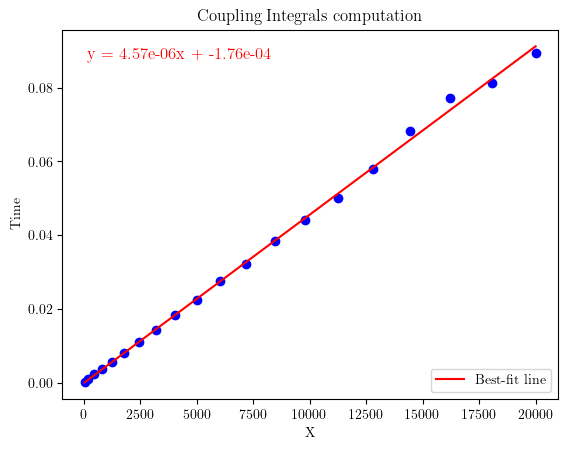

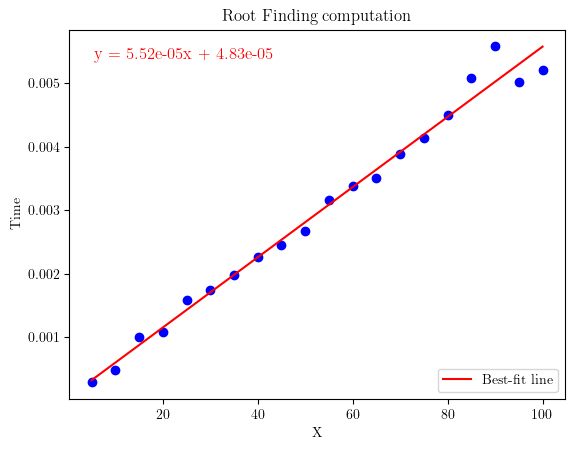

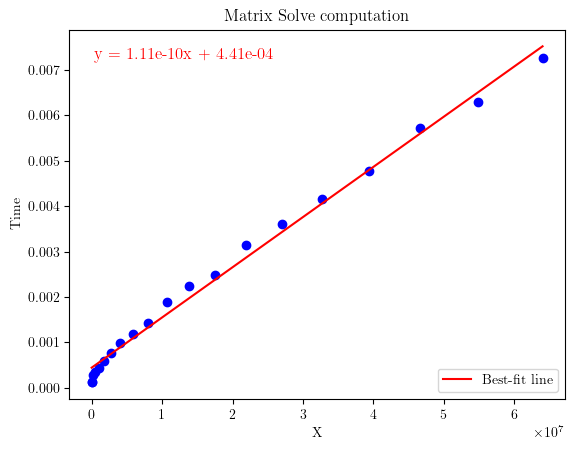

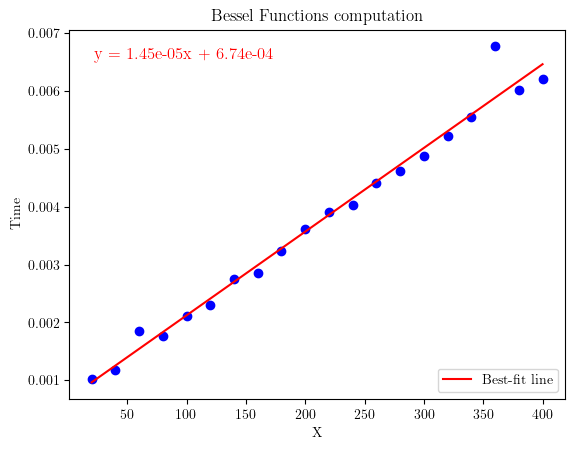

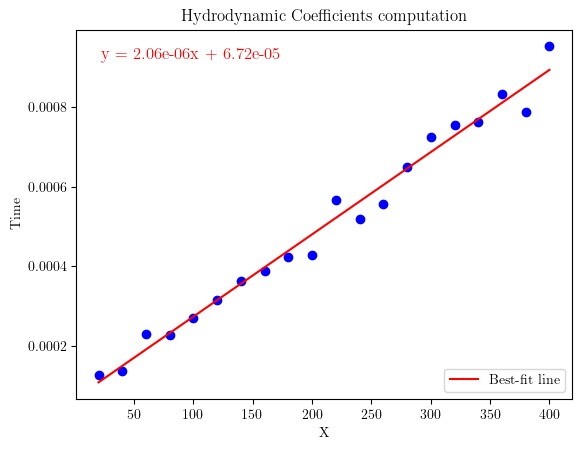

In [8]:
total_unknown_coeffs = lambda NMK: NMK[0] + 2 * sum(NMK[1:-1]) + NMK[-1]
coupling_dep = lambda NMK: sum([NMK[i] * NMK[i+1] for i in range(len(NMK)-1)])
time_dependencies = {"Coupling Integrals" : lambda NMK : coupling_dep(NMK),
                     "Root Finding" : lambda NMK : NMK[-1],
                     "Matrix Solve" : lambda NMK : (total_unknown_coeffs(NMK))**3,
                     "Bessel Functions" : lambda NMK : total_unknown_coeffs(NMK),
                     "Hydrodynamic Coefficients" : lambda NMK : total_unknown_coeffs(NMK)}

def plot_dependence(meem_data, key, xlab):
  xs = []
  ys = []
  NMKs = [[data["nmk"] for i in range(3)] for data in meem_data]
  for i in range(len(meem_data)):
    xs.append(time_dependencies[key](NMKs[i]))
    ys.append(meem_data[i][key])
  plt.scatter(xs, ys, color = "blue")
  coeffs = np.polyfit(xs, ys, deg=1)
  fit_fn = np.poly1d(coeffs)
  x_line = np.linspace(min(xs), max(xs), 100)
  slope, intercept = coeffs
  equation = f"y = {slope:.2e}x + {intercept:.2e}"
  plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes,
          fontsize=12, verticalalignment='top', color='red')
  plt.plot(x_line, fit_fn(x_line), color="red", label="Best-fit line")
  plt.xlabel(xlab)
  plt.ylabel("Time")
  plt.legend()
  plt.title(key + " computation")
  plt.show()
  return slope

tds_factors = {key : plot_dependence(meem_reorganized_data, key, "X") for key in named_meem_times}

In [9]:
# Plot Settings
l_width = 3 # line width
m_size = 7 # marker size
lab_fs = 11 # x and y label font size
leg_fs = lab_fs * 0.88 # legend font size
fig_h = 10 # figure height
fig_w = 4 # figure width

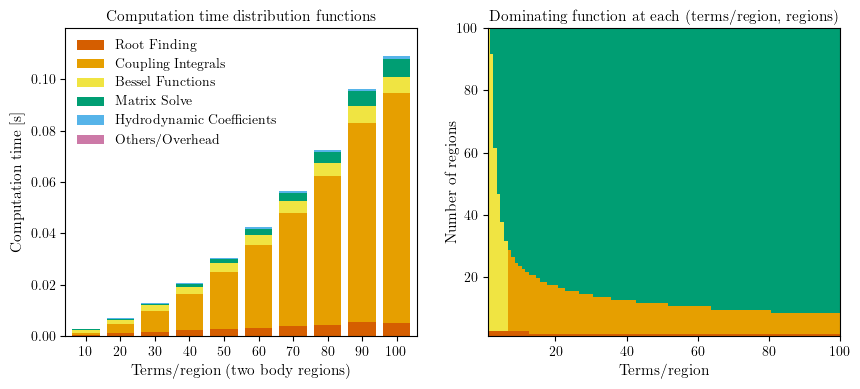

In [11]:
key_colors = {"Root Finding" : colors.red,
              "Coupling Integrals" : colors.orange,
              "Bessel Functions" : colors.yellow,
              "Matrix Solve" : colors.green,
              "Hydrodynamic Coefficients" : colors.skyblue,
              "Others/Overhead" : colors.purple}

def bar_chart(ax, meem_reorganized_data, key_colors):
  x = np.array([data["nmk"] for data in meem_reorganized_data])
  bottom = np.zeros(len(meem_reorganized_data))
  for k in key_colors.keys():
    heights = np.array([record.get(k, 0) for record in meem_reorganized_data])
    ax.bar(x, heights, bottom=bottom, width= 8, color=key_colors[k], label=k)
    bottom += heights

  ax.set_xticks(x)
  ax.set_xlabel("Terms/region (two body regions)", fontsize=lab_fs)
  ax.set_ylabel("Computation time [s]", fontsize=lab_fs)
  ax.legend(loc='upper left', fontsize=leg_fs, frameon=False)
  ax.set_ylim([0, max(bottom) * 1.1])
  ax.set_xlim([min(x) - 6, max(x) + 6])
  ax.set_title("Computation time distribution functions", fontsize=lab_fs, pad=5)

def times_contour(ax, key_colors, 
                  nmks, regions_lst,
                  time_dependencies, tds_factors):
  X, Y = np.meshgrid(nmks, regions_lst)
  keys = time_dependencies.keys()

  func_to_int = {key: i for i, key in enumerate(keys)}

  labels = np.zeros((len(regions_lst), len(nmks)), dtype = int)

  for j, regions in enumerate(regions_lst):
    for i, nmk in enumerate(nmks):
        NMK = [nmk for _ in range(regions)]
        results = {key : tds_factors[key] * time_dependencies[key](NMK) for key in keys}
        # get the function with the maximum (slowest) runtime
        slowest_func = max(results, key=results.get)
        labels[j, i] = func_to_int[slowest_func]

  colors_in_order = [key_colors[key] for key in keys]
  cmap = ListedColormap(colors_in_order)
  norm = BoundaryNorm(np.arange(-0.5, len(colors_in_order)+0.5), len(colors_in_order))
  extent = [nmks[0] - 0.5, nmks[-1] + 0.5,
            regions_lst[0] - 0.5, regions_lst[-1] + 0.5]

  im = ax.imshow(labels, cmap=cmap, norm=norm, origin="lower", extent=extent, interpolation="none", aspect="auto")

  ax.set_xlim([nmks[0], nmks[-1]])
  ax.set_ylim([regions_lst[0], regions_lst[-1]])
  ax.set_xlabel("Terms/region", fontsize=lab_fs)
  ax.set_ylabel("Number of regions", fontsize=lab_fs, labelpad=-1)
  ax.set_title("Dominating function at each (terms/region, regions)", fontsize=lab_fs, pad=5)

fig, ax = plt.subplots(1, 2, figsize=(fig_h, fig_w))
reduced_meem_data = [meem_reorganized_data[i] for i in range(len(meem_reorganized_data)) if i%2 == 1]
bar_chart(ax[0], reduced_meem_data, key_colors)
times_contour(ax[1], key_colors, list(range(1, 101)), list(range(1, 101)), time_dependencies, tds_factors)

full_path = figs_path_prefix + "/MEEM-Comp-Distribution.pdf"
fig.savefig(full_path, format='pdf', dpi=300, bbox_inches='tight')